# Bootstrap Aggregation (Bagging)

- Sample $ \mathcal{D}^{(1)}, \dots, \mathcal{D}^{(K)} $ with replacement from $ \mathcal{D}^{\text{Train}} \in (\mathcal{X} \times \mathcal{Y})^N $ .
- The distribution of sampling one instance \( I \) is:

$$
P((x, y) \mid \mathcal{D}^{\text{Train}}) = \frac{1}{N}.
$$

- Sample a bootstrap $\mathcal{D}^{(k)} \sim I^n $ with replacement, where $ n = |\mathcal{D}^{(k)}|$  and  $n \leq N $.

- Train one model per bootstrap and aggregate an ensemble:

$$
\hat{f}(x) = \frac{1}{K} \sum_{k=1}^K \hat{f}^{(k)}(x).
$$

- Notice that $ \mathcal{D}^{(k)}, \forall k $ are **not i.i.d.** since they share instances:

$$
\hat{f}(x) \not\to \bar{f}, \, \mathbb{E}_x \left[ (\hat{f}(x) - \bar{f}(x))^2 \right] \not\to 0.
$$

In [470]:
import numpy as np
import matplotlib.pyplot as plt

In [471]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.utils import resample

In [472]:
X, y = make_regression(n_samples=200, n_features=1, n_targets=1, random_state=42, noise=30.0)

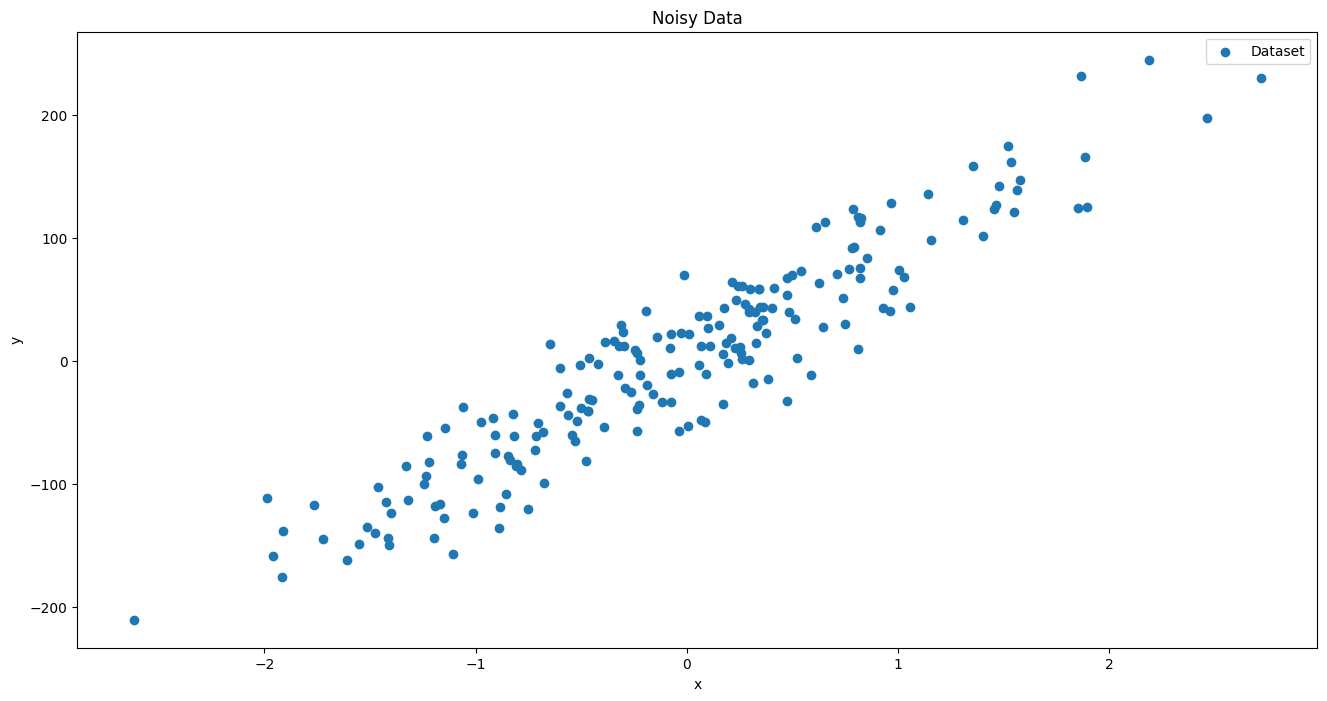

In [473]:
plt.figure(figsize=(16, 8))
plt.title('Noisy Data')
plt.scatter(X, y, label='Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [475]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 1)
y_train shape: (160,)
X_test shape: (40, 1)
y_test shape: (40,)


In [476]:
class BootstrapAggregationRegressor:
	def __init__(self, n_samples: int = 1000) -> None:
		self.models = []
		self.n_samples = n_samples

	def fit(self,
		X: np.ndarray,
        y: np.ndarray) -> None:

		self.models = []	
		for _ in range(self.n_samples):
			model = LinearRegression()
			X_boot, y_boot = resample(X, y, replace=True)
			model.fit(X_boot, y_boot)
			self.models.append(model)
	
	def predict(self, x: np.ndarray) -> np.ndarray:
		out = np.array([model.predict(x) for model in self.models])
		return np.mean(out, axis=0)

In [477]:
model = BootstrapAggregationRegressor()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [478]:
r2 = r2_score(y_hat, y_test)
print(f'R2 score: {r2}')

R2 score: 0.8725555033121527
